### Homework 4 Task 2 Fire Perimeter
- Author: Zoe Zhou
- [Link to github repo](https://github.com/ZoeZhouJ/eds220-hwk4.git)
- Course Website: [EDS 220](https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html#false-color-image)

### About

**Purpose**: This notebook provides step-by-step in struction to select a specific fire perimeter for the 2017 Thomas Fire in Santa Barbara and Ventura Counties. 

**Learning Objective**: 
- Learn to import and explore shapefile in geospatial data
- Practice data wrangling and selection
- Save output to GeoJSON

**About the Data**: The California File Perimeters dataset provides comprehensive information on the geographic boundaries of wildfire preimeters across Califorina. It contains 22,261 fire incident records as a GeoDataFrame with 22 attributes, spanning from 1878 to 2023. It uses the WGS 84 / Pseudo-Mercator (EPSG:3857) coordinate system and includes key temporal, spatial, and management details. 

**Source**:
California Department of Forestry and Fire Protection (CAL FIRE). California Fire Perimeters (all). Data.gov. Retrieved November 21, 2024, from [Data.gov](https://data.gov) on November 21st, 2024.

### Data retrieval

Explore the data and write a brief summary of the information. 

In [2]:
# Import packages
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr

In [3]:
# Import perimeter data
fp = os.path.join('./',
                 'data',
                 'California_Fire_Perimeters_(all)',
                 'California_Fire_Perimeters_(all).shp')
fire = gpd.read_file(fp)

In [4]:
# Preliminary data exploration
fire.head(1)
fire.info()
fire.YEAR_.unique()
fire.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22261 entries, 0 to 22260
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    22261 non-null  int64   
 1   YEAR_       22184 non-null  float64 
 2   STATE       22261 non-null  object  
 3   AGENCY      22208 non-null  object  
 4   UNIT_ID     22194 non-null  object  
 5   FIRE_NAME   15672 non-null  object  
 6   INC_NUM     21286 non-null  object  
 7   ALARM_DATE  16865 non-null  object  
 8   CONT_DATE   9632 non-null   object  
 9   CAUSE       22237 non-null  float64 
 10  C_METHOD    10140 non-null  float64 
 11  OBJECTIVE   22014 non-null  float64 
 12  GIS_ACRES   22261 non-null  float64 
 13  COMMENTS    2707 non-null   object  
 14  COMPLEX_NA  596 non-null    object  
 15  IRWINID     2695 non-null   object  
 16  FIRE_NUM    17147 non-null  object  
 17  COMPLEX_ID  360 non-null    object  
 18  DECADES     22184 non-null  float64 
 

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

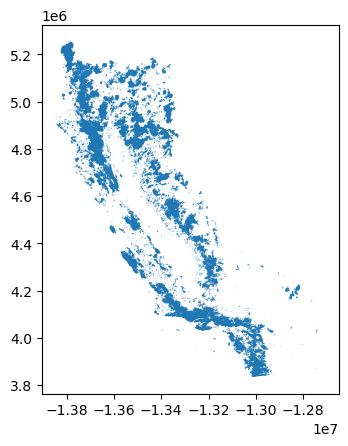

In [5]:
# data visualization
fire.plot()

### Fire perimeter data summary 
The California File Perimeters dataset provides comprehensive information on the geographic boundaries of wildfire preimeters across Califorina. It contains 22,261 fire incident records as a GeoDataFrame with 22 attributes, spanning from 1878 to 2023. It uses the WGS 84 / Pseudo-Mercator (EPSG:3857) coordinate system and includes key temporal, spatial, and management details. 

### Data Selection

In [6]:
fire.FIRE_NAME

0        WHITWORTH
1           KAISER
2          JACKSON
3           CARBON
4          LIBERTY
           ...    
22256       UKNOWN
22257       UKNOWN
22258       UKNOWN
22259       UKNOWN
22260       UKNOWN
Name: FIRE_NAME, Length: 22261, dtype: object

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,Shape__Are,Shape__Len,geometry
2654,2655,2017.0,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9.0,...,281790.9,CONT_DATE based on Inciweb,None,None,None,None,2010.0,1.681106e+09,540531.887458,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


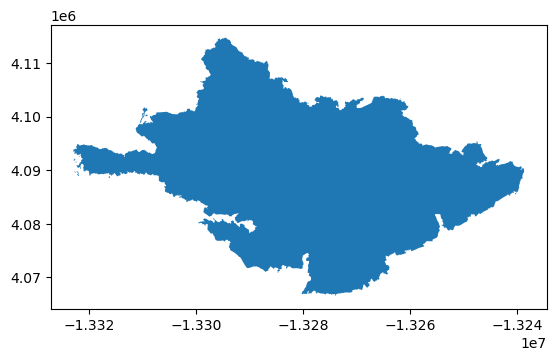

In [7]:
# Select fire by name and year
thomas = fire[(fire['FIRE_NAME'] == 'THOMAS') & (fire['YEAR_'] == 2017)]
thomas.plot()
thomas.head()

In [8]:
# Save file as GeoJSON
thomas.to_file('data/thomas-fire-boundary-file', driver='GeoJSON')

**Format Selection:** GeoJSON is chosen as the output file format due to its wide compatbility, lightweight storage and readability. It is easy to share and efficiently manage with version control systems, making it ideal for collaborative workflows.